In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv ('CC_GENERAL.csv')
# df

In [3]:
# df.info()

In [4]:
# print(df['BALANCE'].min())
# print(df['BALANCE'].max())
# df['BALANCE'].mean()

In [5]:
# df.describe()

In [6]:
# df[df['ONEOFF_PURCHASES']==df ['ONEOFF_PURCHASES'].max()]

In [7]:
# df[df['CASH_ADVANCE']==df ['CASH_ADVANCE'].max()]

In [8]:
# df.isnull().sum()

In [9]:
df.loc [(df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [10]:
df.loc [(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [11]:
# df.isnull().sum()

In [12]:
# df.duplicated().sum()

In [13]:
df.drop('CUST_ID', axis = 1 , inplace = True)

Scale the Data

In [14]:
scaler = StandardScaler ()
df_scale = scaler.fit_transform(df)
# df_scale

In [15]:
# credit_scores =[]

# for i in range (1,20):
#     kmean = KMeans (n_clusters = i)
#     kmean.fit (df_scale)
#     credit_scores.append (kmean.inertia_)

#     plt.plot (credit_scores, 'bx-')

In [16]:
kmean = KMeans (7)
kmean.fit(df_scale)


label = kmean.labels_

# kmean.cluster_centers_.shape

In [17]:
# label

In [18]:
cluster_centers = pd.DataFrame (data = kmean.cluster_centers_, columns= [df.columns])
# cluster_centers

In [19]:
inverse_cluster = scaler.inverse_transform (cluster_centers)
inverse_cluster = pd.DataFrame (data = cluster_centers, columns= [df.columns])
# inverse_cluster

In [20]:
y = kmean.fit_predict (df_scale)
# y

In [21]:
newdf = pd.concat ([df, pd.DataFrame ({'cluster': label})], axis =1 )
# newdf

In [22]:
for i in df.columns:
    plt.figure (figsize = (30,5))
    for j in range (7):
        plt.subplot (1 , 7, j+1)
        cluster = newdf [newdf['cluster']==j]
        cluster [i].hist (bins =20)
    plt.show()  

In [23]:
pca = PCA (n_components = 2)
pca_fit= pca.fit_transform (df_scale)
# pca_fit


In [24]:
pca_df = pd.DataFrame (data=pca_fit, columns = ['pca1', 'pca2'])
# pca_df

In [25]:
pca_df = pd.concat ([pca_df, pd.DataFrame({'cluster': label})], axis = 1)
# pca_df

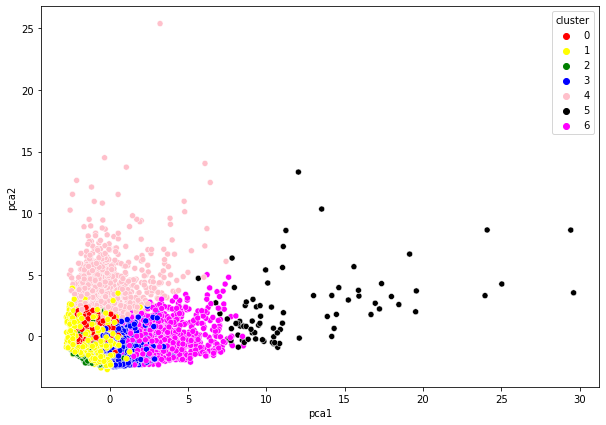

In [26]:
plt.figure (figsize = (10,7))
ax = sns.scatterplot (x = 'pca1', y ='pca2', hue = 'cluster', data = pca_df, palette = ['red', 'yellow', 'green','blue','pink','black', 'magenta'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18074c2b-cdf2-4daa-b880-e946f5464312' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>